# 反爬：登入授權模擬

* 了解「登入權限機制」的反爬蟲機制
* 「登入權限機制」反爬蟲的因應策略

## 作業目標

* 找一個需要登入的網站試試看，並說明思考流程
（如果不知道要用哪個網站的話，可以試試看 https://github.com/new 網址，未登入時會被導向登入頁）



In [1]:
'''
Your Code
'''
import requests
from bs4 import BeautifulSoup


In [2]:
headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7',
    'Cache-Control': 'max-age=0',
    'Connection': 'keep-alive',
    'Cookie': '_octo=GH1.1.131149886.1534131173; _ga=GA1.2.77767004.1534131175; _device_id=f3c6ae8aafde9348de4d6defde4e7f48; tz=Asia%2FTaipei; has_recent_activity=1; logged_in=no; _gh_sess=Q21DQXVvdjFLVWEyWHhEL2NaYkxVSHVnbW03TCs0ZmN6UFM1Q0NjL0txcDdIM3R5N3NvUXcvYzJkTUYwZk92RVIvN0FOYzl5ODNtQjNOK1NDTGlCQzJmWTcxbzE3S0Y1ZzdsSC9zWW5XeGVjYjZRVWVwdjlsak1pWktHQ1Jhcm5IR01KT3NveHhpMGRtSWFrUXZsY05hUkVSRkZuWUZCRmMzR3BWTUlkbEJyK3lqSjlFZThJZXFJUCtiVUx2ZUJQUVNVUjVwT2RjNThyM2xrK0NmZFR5QWNlVTl2MEh1MnBRTFVPc1dYSnlva3gyZFpZdGk3eHdmc0N4QmFsMGp0SlFqUEN6aTBkVTJwVlFCUGFuOFRmQVV1aDJwUFlPUElmcHBybHp5dFNSMktVWkNVRzNqR2pKaEV3dFJxUzJkY01HclA2WGJoK01Za2xnSGpPTVErZTVIc1lUMEhFWFFHbUdGVGNWOVE3LzFBN2xzMVo1QVRQNWhKL2ZBcE1LWGcwQmFaMzc0QmFXTGZYUHNQYkllQ2UrSS9XVFJ6Q3pLMVZvbUNWYis3dG40S0pwL3VnaExjNWFMRjNnS0thRDQ5TmJSM25ybkE2WU1aY0YvdndHbm9yVHZVV3NNZFYxY1BCOXhuNlBCK21KU003bjBlWHdRalNMSVZzTjMrSDZPdWNBZlcyM21ZRW1xRXBpNXlUT0FDTEFRdVlENVpLZ2FoeDg4eGFka2crci9KWlpwTmJUMXpCWS9uS292aTVqc3VERTV3U1FjeldEUGxIM0d5UnN3bWlOc1FYUXBrOVhUSUZ5VHhoT1l6VVJKSDk4UkpVK1RWd09NTlp4TWU0SzZ3czhCOWtscVdDazk5VUJrVnNJeGVvL2xZVC9zbUZZcVZ0dWwxMytYbUxLMXB3c1IrbTF5cjAvbTBkd0RicU5BMU5SQlBDK25iNXMyV1ZobWdlbzFWWXVqMWlmbEFPOW53Wk9KRzg4eUYreEVEOWJNcDFRangrb1orNGhiSUQ5UW5pYzdzVUQ5dlZYMDZ0anZQbTlXeFA3anFUUXRUcUNTVS8ycG95K1p5YW1hTUNiQnNxZHZCTUE0R2J4T1RsL1ZVeEtzaldQTzF5UU5xbnl3YWJUbmRPWlB6bjQveHVRZnd4SmhBd2lIdU4wVDRYc3YyVnI1TWc1Q1d5NE9mWlF1V1dhVUZJcXRPS09LM0tDazMrTytXSkxTMVFxQU9ENFVyc0o1TXhzZ2dxRkZSUzJFbEZuWEVnTGFVQWFJanpUSjBDNVF1bGxHUGZjbW9zK2U0N0UyRkZxdFliVUVnR0RKV0wwNXgraXZoNitHS3lNWWQyVkx4bEI0RWVvVmFNQ0VwcEcvbSsxQnBmSmZVRGxTL1hlWmFvT01PdkNrQXBCT3NHQmlhQ2NRU3F3WVUraU1wVDlFU2Z3TURyam45OHg3U0JuQ09CWlI5NU92bGpJS21PVHNwa0MwSWZOaXFMVUgxamNQc3RPZDhiRk1FdGxCeW1weVg5WTdoT2hQUThJcE16ZDF0Y04wUXdVWFBwRi9mTld1WmZicEhWR2pIRFNWNHR0NmFDeFkwWGVGSkRkWHh5ZzVTYmtHNmo5WlQ4MC8zbUNJQ0M0WFkybytoMW1XU1NWMExTV0RLcHJ2UnAvVVR1cUdtWldMSzViQjdMSVA1UStiMElROWFqYXIySkwwMWUrOWxwMVMvSUpha3JRRHdCbTZtZ1IyVjY4YXBXMGQ3OUxCcXFkbkl3blNrUG5PMjJtWDB6WFVXSTVWNDAxWGxPcVRDdmVnNEJFY1Y2Z1pYclhVUzRZWUNpb0ZlOVdGTWlLWUV6QW56cnVxZEVkMUVZclFsTGVMM2JZRW8xZzhzaS0tVUpBVEpHNlhoMFlyendGUnlwWDZTUT09--95427827b1d33378c7e5ff1f0f12d6c18a8ed63c',
    'Host': 'github.com',
    'If-None-Match': 'W/"e4ad32ea76c02fe8f86ddf6173158de5"',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36'
}

cookies = {
    'dotcom_user':'Paul-HD-Chi',
    'logged_in':'yes',
    'user_session': 'yQw08sacIUFxeji1IiQofymgKwKGZfIqZiaBM2c8VbyExq5l'
}

res = requests.get('https://github.com/new',headers=headers,cookies=cookies)
BeautifulSoup(res.text)

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-02a3eaa24db2bd1ed9b64450595fc2cf.css" integrity="sha512-hddDYPWR0gBbqLRmIZP242WMEiYsVkYI2UCYCVUHB4h5DhD2cbtFJYG+HPh21dZGb+sbgDHxQBNJCBq7YbmlBQ==" media="all" rel="stylesheet"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/github-5dbcecc83daa87a24d1ebee45cd89da4.css" integrity="sha512-8ArQLJDpV7H9drCFVkdRXJ58nXFB

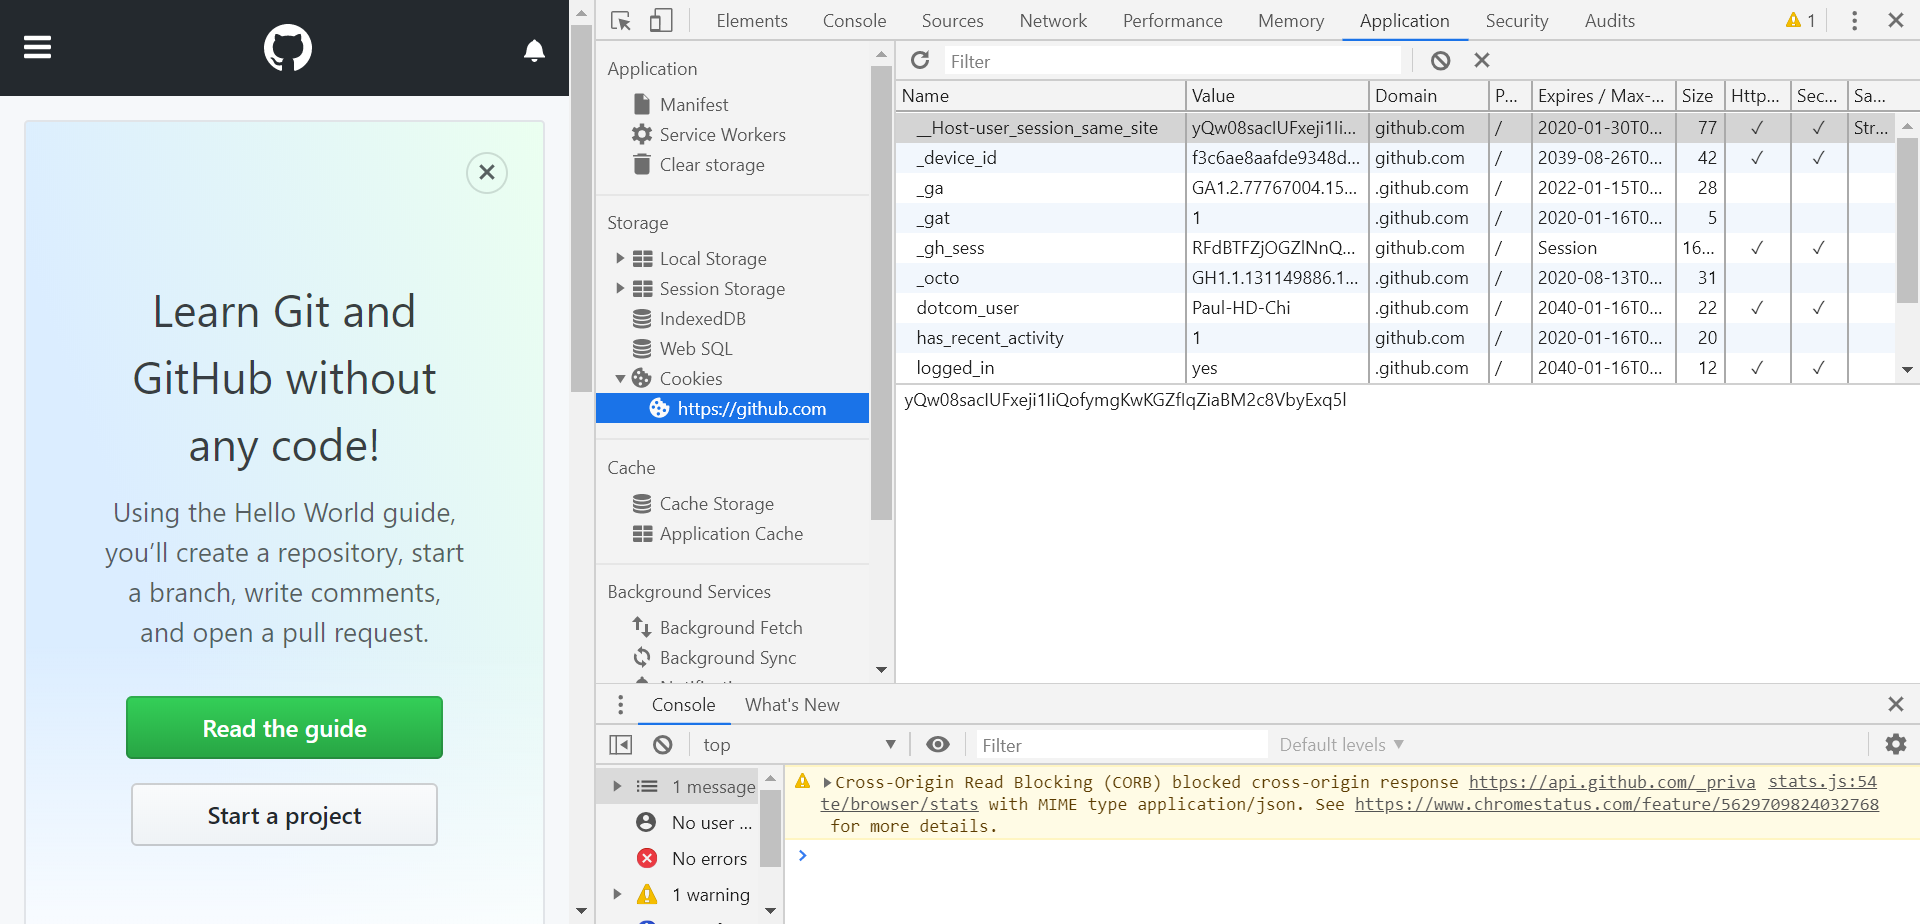